#### XGBOOST

In [1]:
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from sklearn.metrics import accuracy_score, balanced_accuracy_score, classification_report, confusion_matrix, f1_score, recall_score
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder 
import pickle

In [17]:
model = "XGBoost"
start_date = '2020-01-01'
end_date = '2021-10-01'
symbol = "BTCUSDT"
interval = "1h"
filepath = "/Users/bikramgill/Library/CloudStorage/GoogleDrive-bgill@sandiego.edu/My Drive/Masters of Applied Data Sciences/2022 - 3 - Fall/ADS599 - Capstone Project/Tradebot/ML_Tradebot/Production/"

def test_train_data(model, start_date, end_date, symbol, interval, filepath):
    
    ## Load df and cut down to start and end period defined
    df = pd.read_csv(filepath + "Datasets/{}_{}.csv".format(symbol, interval),
                parse_dates = ['close_time']).dropna()
    df = df.loc[(df['close_time']>=start_date) & (df['close_time']<=end_date)]
    
    
    ## Define feature and target columns for X and y
    feature_cols = ['SMA50', 'SMA100', 'SMA200', 'RSI', 'Close_to_Open', 'Close_to_High', 'Close_to_Low', 'Volume_Momentum', 'Trade_Count_Momentum']
    target_col = ['next_two_candles']
    X = df[feature_cols]
    y = df[target_col]
    
    ## Convert text labels with LabelEncoder
    lc = LabelEncoder()
    print(y)
    y = lc.fit_transform(y)
    print(y)
    
    ## Conduct test train split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)
    
    return X_train, X_test, y_train, y_test


In [18]:
X_train, X_test, y_train, y_test = test_train_data(model, start_date, end_date, symbol, interval, filepath)

      next_two_candles
20512             Down
20513             Down
20514          Neutral
20515          Neutral
20516          Neutral
...                ...
35811          Neutral
35812          Neutral
35813          Neutral
35814          Neutral
35815               Up

[15304 rows x 1 columns]
[0 0 1 ... 1 1 2]


/Users/bikramgill/opt/miniconda3/envs/spyder-env/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [16]:
lc

NameError: name 'lc' is not defined

In [4]:
def fit_and_pickle_model(model, start_date, end_date, symbol, interval, filepath,
                         X_train, X_test, y_train, y_test):
    xgboost = XGBClassifier(random_state=1,
                            booster='gbtree',
                            learning_rate=0.1,
                            max_depth=5,
                            objective='multi:softmax')

    xg_boost = xgboost.fit(X_train,y_train)
    
    with open((filepath + 'Models/{}/XGBoost_{}_{}.pickle'.format(model, symbol, interval)), 'wb') as model:
        pickle.dump(xg_boost, model, protocol=pickle.HIGHEST_PROTOCOL)
        
    print("Model has been updated and saved as pickle file")

In [5]:
fit_and_pickle_model(model, start_date, end_date, symbol, interval, filepath,
                         X_train, X_test, y_train, y_test)

Model has been updated and saved as pickle file


In [6]:
with open((filepath + 'Models/{}/XGBoost_{}_{}.pickle'.format(model, symbol, interval)), 'rb') as model:
    xg_boost = pickle.load(model)
    


<AxesSubplot:>

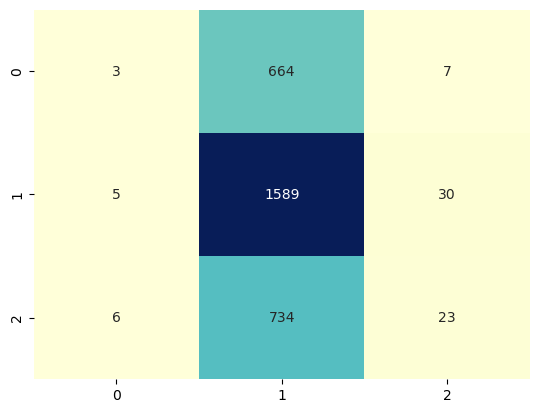

In [7]:
sns.heatmap(confusion_matrix(y_test, xg_boost.predict(X_test)), cmap='YlGnBu', annot=True, xticklabels=[0,1,2], yticklabels=[0,1,2], cbar=False,fmt='g')

#### KNN



In [8]:
model = "KNN"
start_date = '2020-01-01'
end_date = '2021-10-01'
symbol = "BTCUSDT"
interval = "1h"
filepath = "/Users/bikramgill/Library/CloudStorage/GoogleDrive-bgill@sandiego.edu/My Drive/Masters of Applied Data Sciences/2022 - 3 - Fall/ADS599 - Capstone Project/Tradebot/ML_Tradebot/Production/"


from sklearn.neighbors import KNeighborsClassifier

In [9]:
def calibrate_knn(model, start_date, end_date, symbol, interval, filepath,
                         X_train, X_test, y_train, y_test):

    results = []

    for n_neighbors in range(1, 20):
        knn = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X_train, y_train)
        preds = knn.predict(X_test)
        results.append({'n_neighbors': n_neighbors,
                        'accuracy': accuracy_score(y_test, preds),
                        'F1':f1_score(y_test, preds, average='macro')
                        })
    # Convert results to a pandas data frame results = pd.DataFrame(results) print(results)
    results = pd.DataFrame(results)
    results = results.sort_values(by='F1', ascending=False)
    
    print(results)
    
    n_neighbors = int(results.loc[results['F1'].idxmax()]['n_neighbors'])
    
    knn = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X_train, y_train)

    with open((filepath + 'Models/{}/KNN_{}_{}.pickle'.format(model, symbol, interval)), 'wb') as model:
        pickle.dump(knn, model, protocol=pickle.HIGHEST_PROTOCOL)
        
    print("Model has been updated and saved as pickle file")

In [10]:
calibrate_knn(model, start_date, end_date, symbol, interval, filepath,
                         X_train, X_test, y_train, y_test)

    n_neighbors  accuracy        F1
2             3  0.417837  0.347992
0             1  0.396929  0.338509
3             4  0.432865  0.335444
5             6  0.443319  0.331791
6             7  0.459327  0.324430
4             5  0.429271  0.321816
1             2  0.398889  0.317412
7             8  0.458674  0.311437
8             9  0.458020  0.310936
10           11  0.480235  0.303788
12           13  0.489056  0.302051
9            10  0.470434  0.301996
11           12  0.476315  0.298475
13           14  0.488729  0.295168
14           15  0.488402  0.295024
15           16  0.493630  0.288559
16           17  0.491669  0.280629
17           18  0.495590  0.280278
18           19  0.498530  0.273533
Model has been updated and saved as pickle file


In [11]:
with open((filepath + 'Models/{}/KNN_{}_{}.pickle'.format(model, symbol, interval)), 'rb') as model:
    knn = pickle.load(model)

<AxesSubplot:>

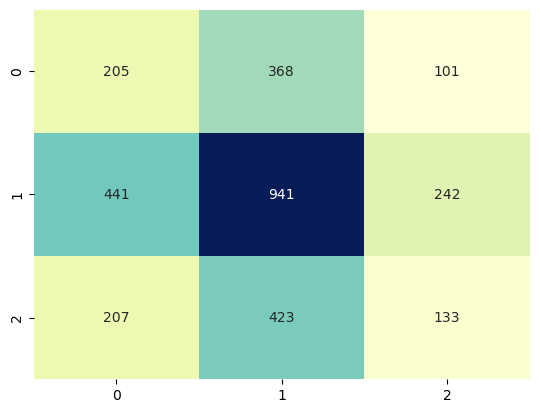

In [12]:
sns.heatmap(confusion_matrix(y_test, knn.predict(X_test)), cmap='YlGnBu', annot=True, xticklabels=[0,1,2], yticklabels=[0,1,2], cbar=False,fmt='g')

In [20]:
confusion_matrix(y_test, knn.predict(X_test))

array([[205, 368, 101],
       [441, 941, 242],
       [207, 423, 133]])

In [36]:
import plotly.express as px
x = ['Down', 'Neutral', 'Up']
y = ['Down', 'Neutral', 'Up']
fig = px.imshow(confusion_matrix(y_test, knn.predict(X_test)), 
                x=x, 
                y=y,
                labels=dict(x="Predicted Values", y="Actual Values"),
                text_auto=True)
fig.show()

In [67]:
#### Classification Report

report = classification_report(y_test, knn.predict(X_test), target_names=['Down', 'Neutral', 'Up'], output_dict=True)
df1 = pd.DataFrame.from_dict(report)[['Down', 'Neutral','Up']]
df1

df2 = pd.DataFrame.from_dict(report)[['accuracy', 'macro avg','weighted avg']] \
        .reset_index(drop=True) \
        .transpose() \
        .drop(columns=3) \
        .rename(columns={0:'Down', 1:'Neutral', 2:'Up'})

df2

final_report = pd.concat([df1, df2])

for i in final_report.columns:
    final_report[i] = final_report[i].round(3)

final_report = final_report.reset_index().rename(columns={'index':'Metric'})

final_report

,Metric,Down,Neutral,Up
0,precision,0.240,0.543,0.279
1,recall,0.304,0.579,0.174
2,f1-score,0.269,0.561,0.215
3,support,674.000,1624.000,763.000
4,accuracy,0.418,0.418,0.418
5,macro avg,0.354,0.353,0.348
6,weighted avg,0.411,0.418,0.410


In [25]:
results = []

for n_neighbors in range(1, 20):
    knn = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X_train, y_train)
    preds = knn.predict(X_test)
    results.append({'n_neighbors': n_neighbors,
                    'accuracy': accuracy_score(y_test, preds),
                    'F1':f1_score(y_test, preds, average='macro')
                    })
# Convert results to a pandas data frame results = pd.DataFrame(results) print(results)
results = pd.DataFrame(results)
results = results.sort_values(by='F1', ascending=False)

n_neighbors = int(results.loc[results['F1'].idxmax()]['n_neighbors'])

knn = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X_train, y_train)

with open((filepath + 'Models/{}/KNN_{}_{}.pickle'.format(model, symbol, interval)), 'wb') as model:
    pickle.dump(knn, model, protocol=pickle.HIGHEST_PROTOCOL)

FileNotFoundError: [Errno 2] No such file or directory: "/Users/bikramgill/Library/CloudStorage/GoogleDrive-bgill@sandiego.edu/My Drive/Masters of Applied Data Sciences/2022 - 3 - Fall/ADS599 - Capstone Project/Tradebot/ML_Tradebot/Production/Models/<_io.BufferedReader name='/Users/bikramgill/Library/CloudStorage/GoogleDrive-bgill@sandiego.edu/My Drive/Masters of Applied Data Sciences/2022 - 3 - Fall/ADS599 - Capstone Project/Tradebot/ML_Tradebot/Production/Models/KNN/KNN_BTCUSDT_1h.pickle'>/KNN_BTCUSDT_1h.pickle"

In [76]:
import os 

path = r"/Users/bikramgill/Library/CloudStorage/GoogleDrive-bgill@sandiego.edu/My Drive/Masters of Applied Data Sciences/2022 - 3 - Fall/ADS599 - Capstone Project/Tradebot/ML_Tradebot/Production"
symbol = "BTCUSDT"
interval = "4h"

latest_candle_df = pd.read_csv(os.path.join(path, 'Datasets/', symbol + '_' + interval + '.csv'))

latest_candle_df['close_time'] = pd.to_datetime(latest_candle_df['close_time'])
latest_candle_df

,close_time,open,high,low,close,volume,trade_count,SMA50,SMA100,SMA200,RSI,Close_to_Open,Close_to_High,Close_to_Low,Volume_Momentum,Trade_Count_Momentum,next_two_candles
0,2017-09-19 10:59:59.999,3969.32,4029.99,3901.02,3965.01,171.194272,1315,1.037321,0.969071,0.943709,55.899348,0.998914,0.998914,0.998914,1.023844,1.003740,Neutral
1,2017-09-19 14:59:59.999,3970.00,4014.56,3871.99,3890.01,122.480176,1165,1.019308,0.952096,0.926365,52.369536,0.979851,0.979851,0.979851,0.735709,0.896568,Neutral
2,2017-09-19 18:59:59.999,3890.02,3920.00,3830.91,3910.04,137.784085,1296,1.026392,0.958545,0.931709,53.219142,1.005147,1.005147,1.005147,0.874881,1.025073,Neutral
3,2017-09-19 22:59:59.999,3910.04,3923.26,3843.00,3875.93,110.321379,1042,1.019077,0.951922,0.924106,51.533341,0.991276,0.991276,0.991276,0.718738,0.832601,Up
4,2017-09-20 02:59:59.999,3875.91,3988.83,3820.00,3913.89,147.874688,1643,1.030654,0.962597,0.933614,53.306014,1.009799,1.009799,1.009799,1.063211,1.376854,Up
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11373,2022-12-02 21:59:59.999,17092.66,17638.92,16384.99,17020.82,1313.067600,43474,1.022140,1.028070,0.958858,59.260956,0.995797,0.995797,0.995797,1.013913,1.455104,Down
11374,2022-12-03 01:59:59.999,17020.93,17638.92,16326.71,16964.95,1236.562768,34658,1.018338,1.024364,0.956659,55.834303,0.996711,0.996711,0.996711,0.989277,1.157520,Neutral
11375,2022-12-03 05:59:59.999,16964.53,17643.47,16263.14,16944.27,1206.643916,36170,1.016537,1.022876,0.956481,54.576356,0.998806,0.998806,0.998806,0.975392,1.175641,Up
11376,2022-12-03 09:59:59.999,16944.16,17643.47,16922.63,16960.81,1080.669707,27986,1.016920,1.023690,0.958397,55.441057,1.000983,1.000983,1.000983,0.877257,0.899042,Neutral


In [88]:
max_candle_time = latest_candle_df['close_time'].max()
max_candle_data = latest_candle_df.loc[latest_candle_df['close_time'] == max_candle_time]

max_candle_data

,close_time,open,high,low,close,volume,trade_count,SMA50,SMA100,SMA200,RSI,Close_to_Open,Close_to_High,Close_to_Low,Volume_Momentum,Trade_Count_Momentum,next_two_candles
11377,2022-12-03 13:59:59.999,16961.04,16983.16,16499.47,16964.17,914.025833,25447,1.016595,1.023621,0.959614,55.625857,1.000185,1.000185,1.000185,0.770486,0.818906,Neutral


In [82]:
feature_cols = ['SMA50', 'SMA100', 'SMA200', 'RSI', 'Close_to_Open', 'Close_to_High', 'Close_to_Low', 'Volume_Momentum', 'Trade_Count_Momentum']
max_candle_cols = max_candle_data[feature_cols]

max_candle_cols

,SMA50,SMA100,SMA200,RSI,Close_to_Open,Close_to_High,Close_to_Low,Volume_Momentum,Trade_Count_Momentum
11377,1.016595,1.023621,0.959614,55.625857,1.000185,1.000185,1.000185,0.770486,0.818906


In [87]:
prediction_val = int(xg_boost.predict(max_candle_cols))
prediction_val

1